<a href="https://colab.research.google.com/github/zackcmariano/AdvPrev---Desktop/blob/main/C%C3%B3pia_de_Limpeza_Database_Previd%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Limpando os Dados:


**Fonte dos dados Previdenciários:** https://dados.gov.br/dataset/inss-beneficios-indeferidos

In [1]:
#IMPORTANDO AS BIBLIOTECAS

import pandas as pd
import numpy as np

In [2]:
#CARREGANDO O ARQUIVO ORIGINAL E DELIMITANDO AS COLUNAS
bnf = pd.read_csv('https://raw.githubusercontent.com/zackcmariano/AdvPrev---Desktop/main/Obten%C3%A7%C3%A3o%20e%20Limpeza%20(database)/beneficios-indeferidos-12-2020.csv', delimiter=';', names=list(range(9)))

In [3]:
#RENOMEANDO AS COLUNAS
bnf.rename(columns={0:'Competência',1:'Espécie',2:'Motivo',3:'Nascimento',
                   4:'Sexo',5:'Moradia',6:'Filiação',7:'UF',
                   8:'Indeferimento'}, inplace = True)

In [4]:
#ANALISANDO AS PRIMEIRAS ENTRADAS
bnf.head()

,Competência,Espécie,Motivo,Nascimento,Sexo,Moradia,Filiação,UF,Indeferimento
0,Competência indeferimento,Espécie,Motivo Indeferimento,Dt Nascimento,Sexo.,Clientela,Forma Filiação,UF,Dt Indeferimento
1,01/12/2020,Aposentadoria por Idade,"Falta Periodo Carencia (B41,42,46,57,80)",08/01/1957,Feminino,Urbano,Autônomo,Alagoas,02/12/2020
2,01/12/2020,Aposentadoria por Tempo de Contribuição,Falta Tempo Contrib Ate 16/12/1998 ou Até Der,15/02/1965,Masculino,Urbano,Empregado,Alagoas,02/12/2020
3,01/12/2020,Aposentadoria por Tempo de Contribuição,Falta Tempo Contrib Ate 16/12/1998 ou Até Der,16/06/1963,Masculino,Urbano,Empregado,Alagoas,02/12/2020
4,01/12/2020,Aposentadoria por Idade,Recebimento Outro Beneficio,27/10/1947,Feminino,Urbano,Facultativo,Alagoas,01/12/2020


In [5]:
#EXCLUINDO A PRIMEIRA LINHA 
bnf_inss = bnf.drop(0)

In [6]:
#LIMPEZA CONCLUÍDA
bnf_inss.head()

,Competência,Espécie,Motivo,Nascimento,Sexo,Moradia,Filiação,UF,Indeferimento
1,01/12/2020,Aposentadoria por Idade,"Falta Periodo Carencia (B41,42,46,57,80)",08/01/1957,Feminino,Urbano,Autônomo,Alagoas,02/12/2020
2,01/12/2020,Aposentadoria por Tempo de Contribuição,Falta Tempo Contrib Ate 16/12/1998 ou Até Der,15/02/1965,Masculino,Urbano,Empregado,Alagoas,02/12/2020
3,01/12/2020,Aposentadoria por Tempo de Contribuição,Falta Tempo Contrib Ate 16/12/1998 ou Até Der,16/06/1963,Masculino,Urbano,Empregado,Alagoas,02/12/2020
4,01/12/2020,Aposentadoria por Idade,Recebimento Outro Beneficio,27/10/1947,Feminino,Urbano,Facultativo,Alagoas,01/12/2020
5,01/12/2020,Aposentadoria por Idade,"Falta Periodo Carencia (B41,42,46,57,80)",17/10/1959,Feminino,Urbano,Autônomo,Alagoas,02/12/2020


### Criando novo Database a partir das alterações

In [10]:
#NOVO DATAFRAME
database_prev = bnf_inss

In [14]:
#TOTAL DE ENTRADAS NO DATAFRAME
database_prev.count()

Competência      374415
Espécie          374415
Motivo           374415
Nascimento       374380
Sexo             374415
Moradia          374415
Filiação         374415
UF               374415
Indeferimento    374415
dtype: int64

In [8]:
motivos = database_prev['Motivo'].value_counts().head(5)

In [9]:
motivos.head(5)


Parecer Contrario Pericia Medica                                                                        51311
Falta de Requisitos p/Direito Às Regras de Transição Emenda Constitucional No.103 ou Falta de Direit    29387
Não Apresentação ou Conformação dos Dados Contidos no Atestado Médico                                   22595
Nao Enquadramento Art 20 §3 Lei 8742/93.                                                                21560
Falta Periodo de Inscricao ou Atualizacao dos Dados do Cad Unico.                                       21227
Name: Motivo, dtype: int64

In [ ]:
dataframe = {'id_motivo': ['1', '2', '3', '4', '5'],
             'quantos': ['51311', '29387', '22595', '21560', '21227']}

In [ ]:
motivo = pd.DataFrame(dataframe)

In [ ]:
motivo.head()

,id_motivo,quantos
0,1,51311
1,2,29387
2,3,22595
3,4,21560
4,5,21227


In [ ]:
motivo.to_csv('motivo.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 3 artists>

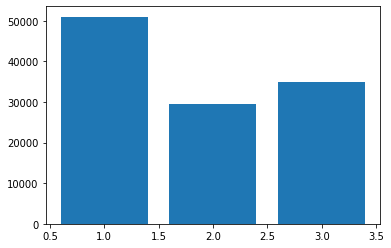

In [ ]:
x = (1, 2, 3)
y = (51000, 29387, 35000)
plt.bar(x , y)

In [ ]:
database_prev['UF'].value_counts().head(5)

Distrito Federal     84450
São Paulo            68493
Minas Gerais         33464
Rio Grande do Sul    26534
Bahia                21837
Name: UF, dtype: int64

In [ ]:
dataframe = {'id_UF': ['1', '2', '3', '4', '5'],
             'quantos': ['84450', '68493', '33464', '26534', '21837']}

In [ ]:
uf = pd.DataFrame(dataframe)

In [ ]:
uf.head()

,id_UF,quantos
0,1,84450
1,2,68493
2,3,33464
3,4,26534
4,5,21837


<BarContainer object of 5 artists>

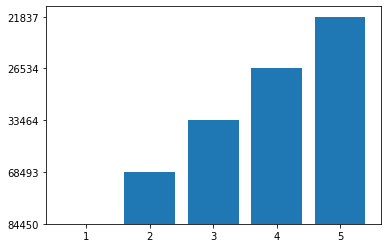

In [ ]:
x = uf.id_UF
y = uf.quantos

plt.bar(x, y)

In [ ]:
uf.to_csv('uf.csv', index=False)

In [ ]:
database_prev.loc[database_prev['UF']=='Bahia','Motivo'].value_counts().head(5)

Parecer Contrario Pericia Medica                                                                        3782
Falta Comprovação Atividade Rural em Números Iguais Carencia Nb                                         1800
Perda de Qualidade do Segurado                                                                          1355
Falta Tempo Contrib Ate 16/12/1998 ou Até Der                                                           1243
Falta de Requisitos p/Direito Às Regras de Transição Emenda Constitucional No.103 ou Falta de Direit    1109
Name: Motivo, dtype: int64

In [ ]:
database_prev.loc[database_prev['UF']=='Distrito Federal','Motivo'].value_counts().head(5)

Nao Enquadramento Art 20 §3 Lei 8742/93.                                                                12636
Falta Periodo de Inscricao ou Atualizacao dos Dados do Cad Unico.                                       12432
Não Apresentação ou Conformação dos Dados Contidos no Atestado Médico                                    8597
Falta de Requisitos p/Direito Às Regras de Transição Emenda Constitucional No.103 ou Falta de Direit     7328
Nao Atende ao Criterio de Deficiencia para Acesso ao Bpc-Loas                                            5054
Name: Motivo, dtype: int64

In [ ]:
#SALVANDO O NOVO ARQUIVO
database_prev.to_csv('database_prev.csv', index=False)

## Processo concluído.